# K-均值聚类

## Introducing k-Means

###  二维数组 k-means 聚类

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

In [2]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [3]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [4]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

###  一维数组 k-means 聚类

In [12]:
x = np.random.randn(10).reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)
for i, j in zip(x, kmeans.labels_):
    print(float(i), j)

0.5633628754677159 2
0.7956238700806237 2
1.2830998845976225 2
0.06831493971977604 1
-0.15765262205216282 1
-1.5899310917885234 0
0.1986955972598977 1
-0.44280027168381675 1
-2.800952391052899 0
-0.061949846906550685 1


In [15]:
##  kmeans.predict(x) 等同于 kmeans.labels_
kmeans.predict(x)

array([2, 2, 2, 1, 1, 0, 1, 1, 0, 1])

### 可视化

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

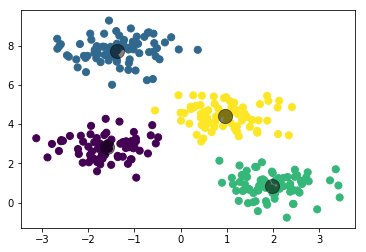

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## k-means 算法需要注意的问题

### The number of clusters must be selected beforehand

Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.

Whether the result is meaningful is a question that is difficult to answer definitively; one approach that is rather intuitive, but that we won't discuss further here, is called [silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Alternatively, you might use a more complicated clustering algorithm which has a better quantitative measure of the fitness per number of clusters (e.g., Gaussian mixture models; see [In Depth: Gaussian Mixture Models](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)) or which can choose a suitable number of clusters (e.g., DBSCAN, mean-shift, or affinity propagation, all available in the ``sklearn.cluster`` submodule)

## Example
### Example 1: k-means on digits

In [21]:
from sklearn.datasets import load_digits
## 手写数字数据集load_digits()：用于多分类任务的数据集
digits = load_digits()
digits.data.shape

(1797, 64)

In [28]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

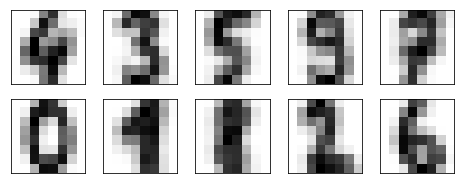

In [35]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8

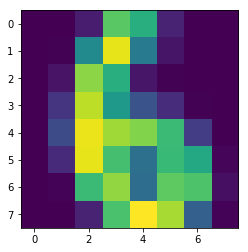

In [42]:
##  相当于热图
plt.imshow(center)
plt.show()

In [62]:
from scipy.stats import mode

##  生成同等维度与矩阵
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    ##  digits.target：特征向量对应的标记
    ##  寻找同一label下，digital.target出现次数最多的成员[0],而[1]则表示数量
    labels[mask] = mode(digits.target[mask])[0]
labels

array([0, 8, 8, ..., 8, 9, 9])

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits! Let's check the confusion matrix for this：

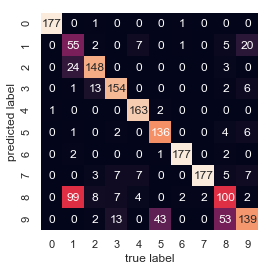

In [68]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Just for fun, let's try to push this even farther. We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm (mentioned in In-Depth: [Manifold Learning](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html)) to pre-process the data before performing k-means. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters. Let's see how it does:

In [69]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121

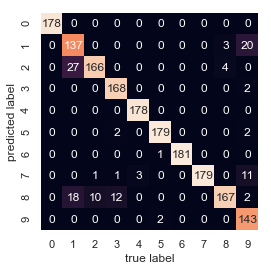

In [77]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [72]:
##  混淆矩阵（测试集，预测结果）
confusion_matrix(digits.target, labels)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 137,  27,   0,   0,   0,   0,   0,  18,   0],
       [  0,   0, 166,   0,   0,   0,   0,   1,  10,   0],
       [  0,   0,   0, 168,   0,   2,   0,   1,  12,   0],
       [  0,   0,   0,   0, 178,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,   0, 179,   1,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   3,   4,   0,   0,   0,   0,   0, 167,   0],
       [  0,  20,   0,   2,   0,   2,   0,  11,   2, 143]], dtype=int64)